In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('../src/')))
from lidar_data_processor import Lidar_Processor

In [4]:
polygon_array= [446112.3120340019  , 4652575.060161518 , 447610.6998241764,4654067.900678839]
processor = Lidar_Processor(polygon_array , '../src/assets/pipeline_template.json', '../src/assets/metadata.csv', epsg=26915)
geo_df , tiff_file_path = processor.fetch_file()
geo_df

,elevation,geometry
0,275.39,POINT (447619.533 4654049.612)
1,275.37,POINT (447617.716 4654049.247)
2,275.26,POINT (447613.814 4654049.587)
3,275.28,POINT (447615.579 4654049.952)
4,275.34,POINT (447620.956 4654051.053)
...,...,...
1439566,285.32,POINT (446721.320 4652571.882)
1439567,285.54,POINT (446714.036 4652572.440)
1439568,285.47,POINT (446705.371 4652572.439)
1439569,285.51,POINT (446708.781 4652571.909)


In [5]:
gdf = geo_df

In [6]:
from glob import glob
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import plotting_extent

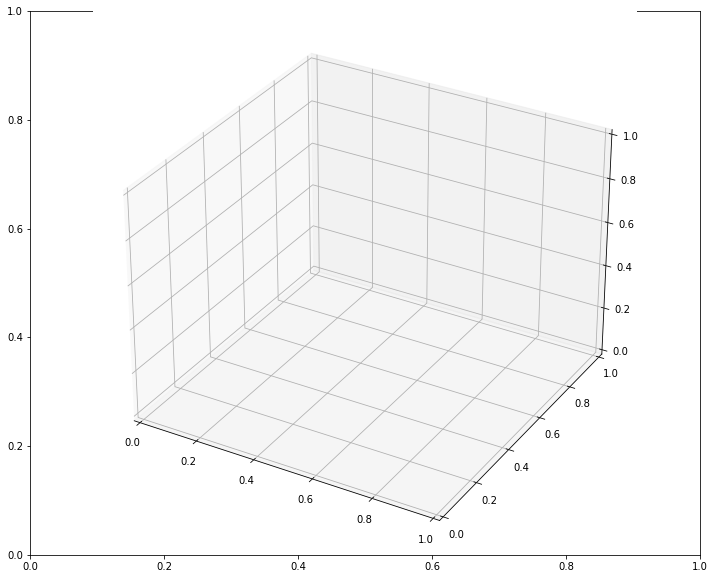

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax = plt.axes(projection='3d')

In [21]:
ax.scatter(gdf.geometry.x, gdf.geometry.y, gdf.elevation, s=0.01)
plt.show()

In [22]:
tiff_file_path

'/home/etta/Documents/Projects/Pylidar/src/assets/data/IA_FullState.tif'

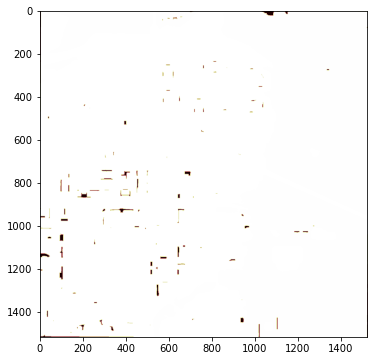

In [23]:
src = rio.open(tiff_file_path)
plt.figure(figsize=(10, 6))
plt.imshow(src.read(1), cmap='pink')
plt.show()

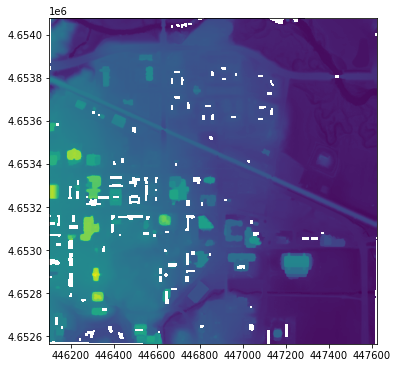

<AxesSubplot:>

In [18]:
plt.figure(figsize=(10, 6))
rio.plot.show(src)

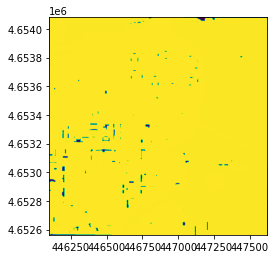

<AxesSubplot:>

In [17]:
rio.plot.show((src, 1), transform=src.transform, cmap='viridis')

<AxesSubplot:>

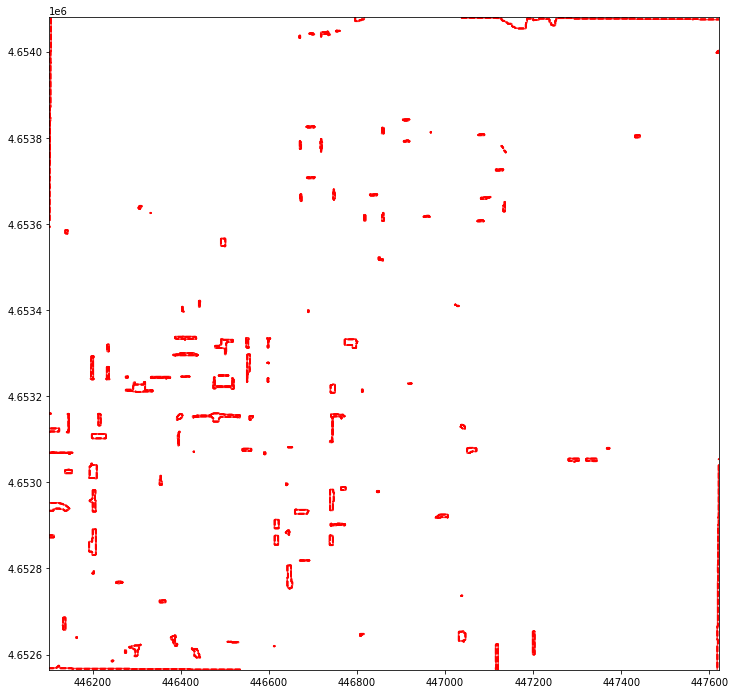

In [16]:
fig, ax = plt.subplots(1, figsize=(12, 12))
rio.plot.show((src, 1), ax=ax, contour=True, contour_label_kws={})

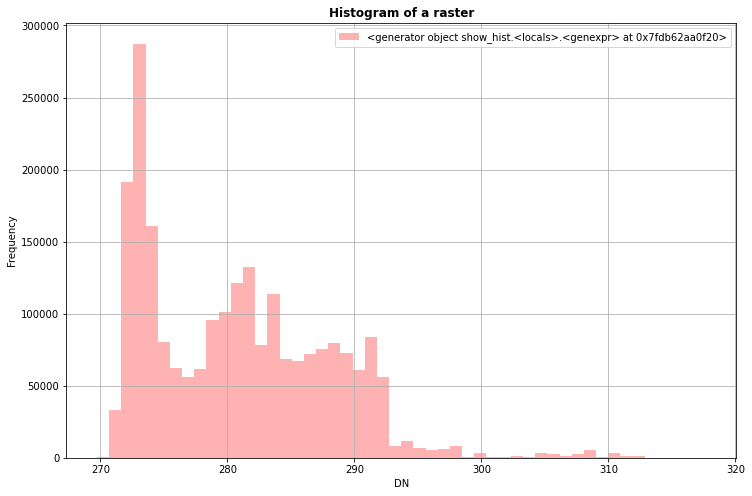

In [15]:
plt.figure(figsize=(12, 8))
from rasterio.plot import show_hist
show_hist(
    src, bins=50, lw=0.0, stacked=False, alpha=0.3,
   histtype='stepfilled', title="Histogram of a raster")

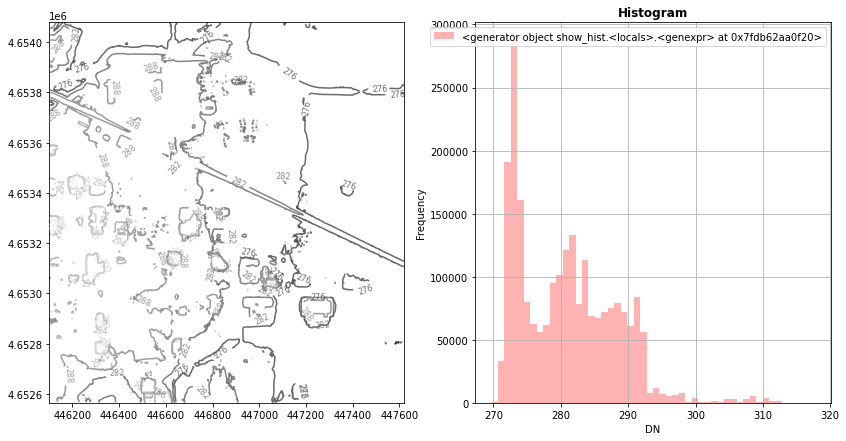

In [14]:
fig, (axrgb, axhist) = plt.subplots(1, 2, figsize=(14,7))
rio.plot.show((src), cmap='Greys_r', contour=True, ax=axrgb)
show_hist(src, bins=50, histtype='stepfilled',
          lw=0.0, stacked=False, alpha=0.3, ax=axhist)
plt.show()
